O Teorema do Limite Central
===========================



## Objetivo



O Teorema do Limite Central é importantíssimo para probabilidade e estatística. Sua tarefa é se informar sobre este teorema, explicar o teorema com suas palavras de maneira clara e explorar este teorema através de simulações em Python. Em especial, visualizações gráficas para dar suporte à sua busca por conhecimento são muito bem-vindas!

Fique à vontade para estudar pelo material que preferir. Abaixo estão três links para vídeos que apresentam excelentes visualizações dos conceitos envolvidos nesta tarefa.

-   [https://www.youtube.com/watch?v=zeJD6dqJ5lo](https://www.youtube.com/watch?v=zeJD6dqJ5lo)
-   [https://www.youtube.com/watch?v=cy8r7WSuT1I](https://www.youtube.com/watch?v=cy8r7WSuT1I)
-   [https://www.youtube.com/watch?v=d_qvLDhkg00](https://www.youtube.com/watch?v=d_qvLDhkg00)



## A teoria


<p style='text-align:justify'> O Teorema do Limite Central (TLC) afirma que a média das amostras do mesmo tamanho de uma população, independente da sua distribuição, irão estar distribuídas de acordo com o comportamento de uma distribuição normal (gaussiana), desde que o tamanho dessa amostra seja suficientemente grande $[1]$$[2]$. Ademais, a convenção é que dada um tamanho de amostra $n$, temos que o TLC será aplicado caso $n \geq 30$. Caso contrário, se $n < 30$, é possível não haver uma distribuição normal para a média das amostras $[1] \space [2]$.

<p style='text-align:justify'> Além disso, o TLC possui uma importância muito grande no contexto científico já que, quando realizamos um experimento e conseguimos obter a média dos dados, mesmo sem saber a qual distribuição os dados pertencem, podemos aplicar o TLC e utilizar essa distribuição normal de média amostral para computar estatísticas $[2]$. Como exemplos, poderíamos formular intervalos de confiança, testes t de Student para comparar a média de dois grupos $[3]$ e ANOVAs (Análise de variância) que compara as variâncias entre as medianas (ou médias) de grupos diferentes $[4]$. 

<p style='text-align:justify'> Ademais, também é possível enunciar o Teorema do Limite central matemáticamente. Sendo uma amostra aleatória $(X_1,X_2,X_3,\dots,X_n)$ que possui tamanho $n$ e que foi selecionada a partir de uma população de média $\mu$ e variância $\sigma^2$. Então, conforme aumentamos $n$, a distribuição amostral da média, dada por $[5]$
    $$\frac{\sum_{i=1}^n X_i}{n} = \bar{X} $$
se aproxima de uma distribuição normal que possui média $u$ e variância $\frac{\sigma^2}{n}$ $[5]$. 

<p style='text-align:justify'> Enfim, com a teoria do TLC elucidada, podemos partir para uma situação contextualizada em que ele pode ser aplicado.

## O contexto

Anidel, um inovador professor de estatística, decidiu ensinar sua matéria para a turma usando RPG. Ele acreditava que a dinâmica do RPG poderia tornar o aprendizado mais interessante e eficaz. Mas ele, como cientista, estava também curioso nos efeitos dessa estratégia de ensino para o aprendizado dos estudantes. 

Assim, no final do semestre, a turma participou de um teste padronizado sobre estatística - e, de forma geral, foram muito bem :) a média foi 80, com desvio padrão 5

No entanto, o diretor da instituição solicitou apenas uma amostra dos resultados para avaliação do desempenho, que seria comparada com uma outra amostra - de uma turma que não utiliza RPG para aprender :( como consequência dessa má escolha pedagógica, a média da turma era 60, com desvio padrão 10

Algo interessante sobre as turmas é que elas são bem grandes: 1200 alunos em cada. Haja paciência para lidar com tanta gente!

Aqui, analisamos duas coisas: como o tamanho da amostra afeta a forma da distribuição e a média e desvio-padrão da amostragem. E também como tirar a média repetidas vezes pode ser usado para chegar em uma distribuição com média e desvio padrão que convergem às da população.

## Gerando as turmas e as notas

<p style='text-align:justify'> Para gerar as turmas e as notas, armazenamos o tamanho das turmas em variáveis e criamos listas para armazernas as notas. Assim, geramos as notas a partir de uma distribuição normal usando o módulo <code>random</code> do numpy. Enfim, iteramos loops <i>for</i> a partir dos tamanhos das turmas, gerando as notas e adicionando-as nas listas vazias.

In [54]:
import random

tamanho_turma_RPG = 1200
tamanho_turma_sem_RPG = 1200

notas_RPG = []
notas_sem_RPG = []
 
# Gerando distribuição normal com média 80 e desvio padrão 5
notas_turma_RPG = np.random.normal(80, 5, tamanho_turma_RPG)

# Gerando distribuição normal com média 60 e desvio padrão 10
notas_turma_sem_RPG = np.random.normal(60, 10, tamanho_turma_sem_RPG)

# Gerando as notas da turma

for aluno_feliz in range(tamanho_turma_RPG):
    nota = random.choice(notas_turma_RPG)
    nota = round(nota)
    notas_RPG.append(nota)
    
for aluno_triste in range(tamanho_turma_sem_RPG):
    nota = random.choice(notas_turma_sem_RPG)
    nota = round(nota)
    notas_sem_RPG.append(nota)


Assim, usamos o biblioteca `matplotlib` para plotar as distribuições de nota das duas turmas.

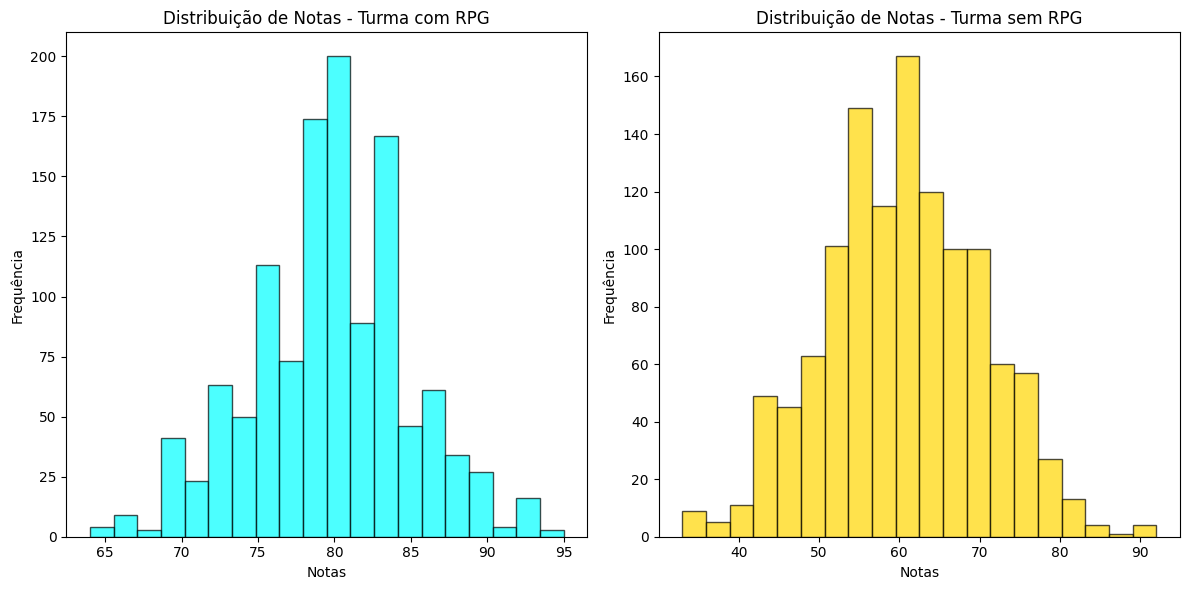

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(notas_RPG, bins=20, edgecolor='black', alpha=0.7, color='cyan')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Distribuição de Notas - Turma com RPG')

plt.subplot(1, 2, 2)
plt.hist(notas_sem_RPG, bins=20, edgecolor='black', alpha=0.7, color='gold')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Distribuição de Notas - Turma sem RPG')

plt.tight_layout()
plt.show()

## Gerando as amostras pedidas por Dr. Beto

Dr. Betinho, o diretor do instituto em que trabalha Anidel, pediu as amostras de cada turma. Também curioso com o que aconteceria com diferentes tamanhos de amostra, pediu que o professor sorteasse, de cada turma, diferentes quantidades de alunos para representarem o desempenho do todo. 

No primeiro sorteio, a nota de 5 alunos seriam sorteadas. No segundo, 50. No terceiro, 100. E, por último 1000.

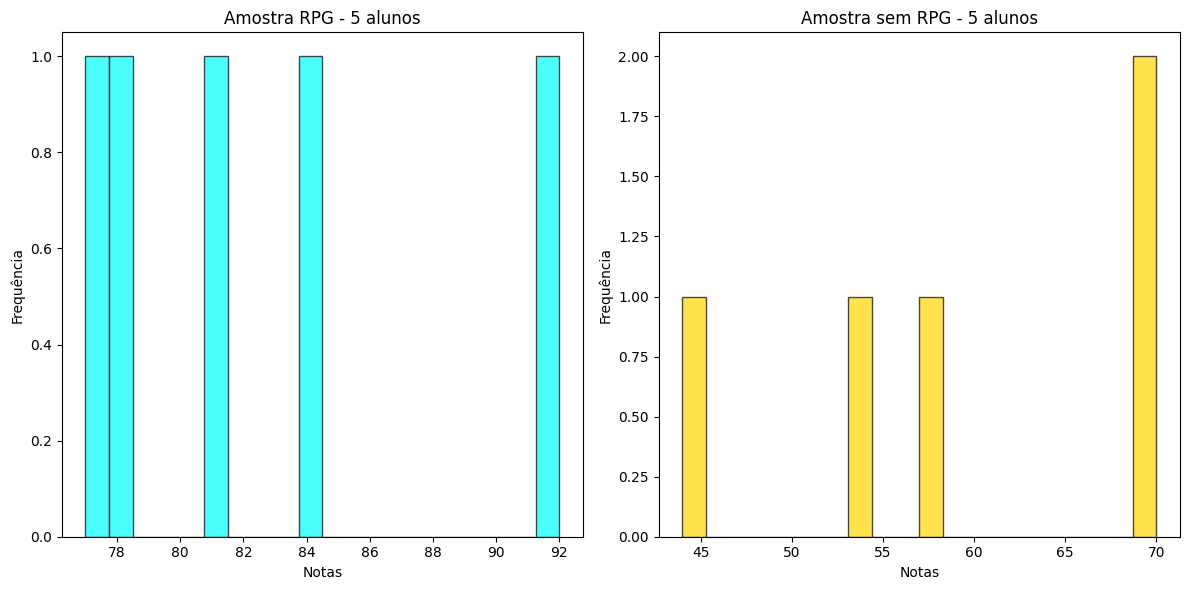

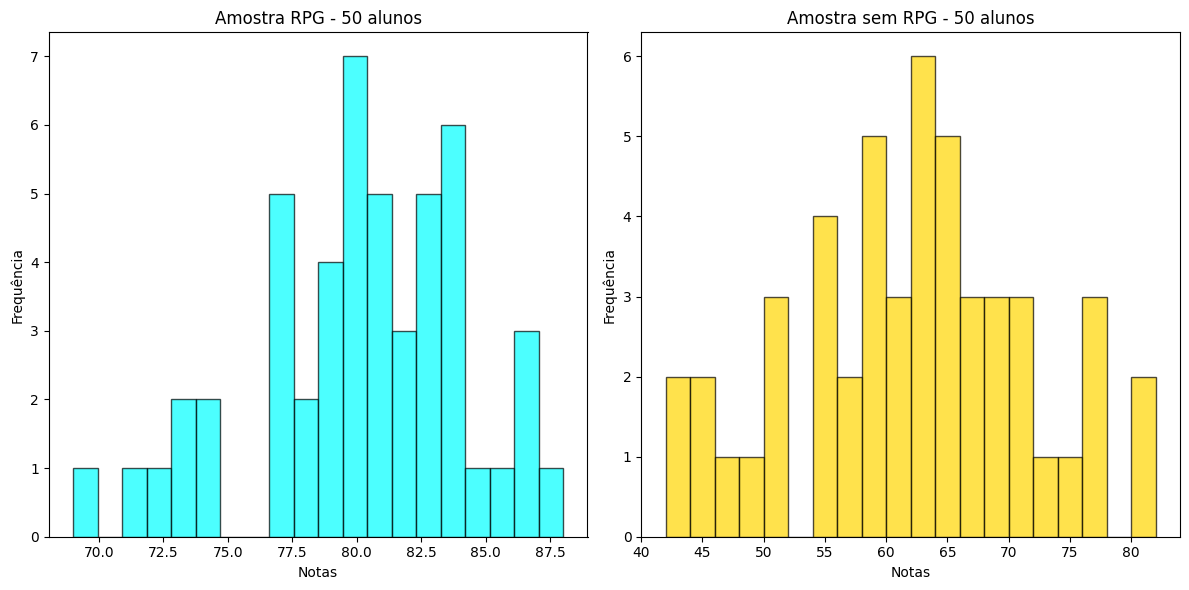

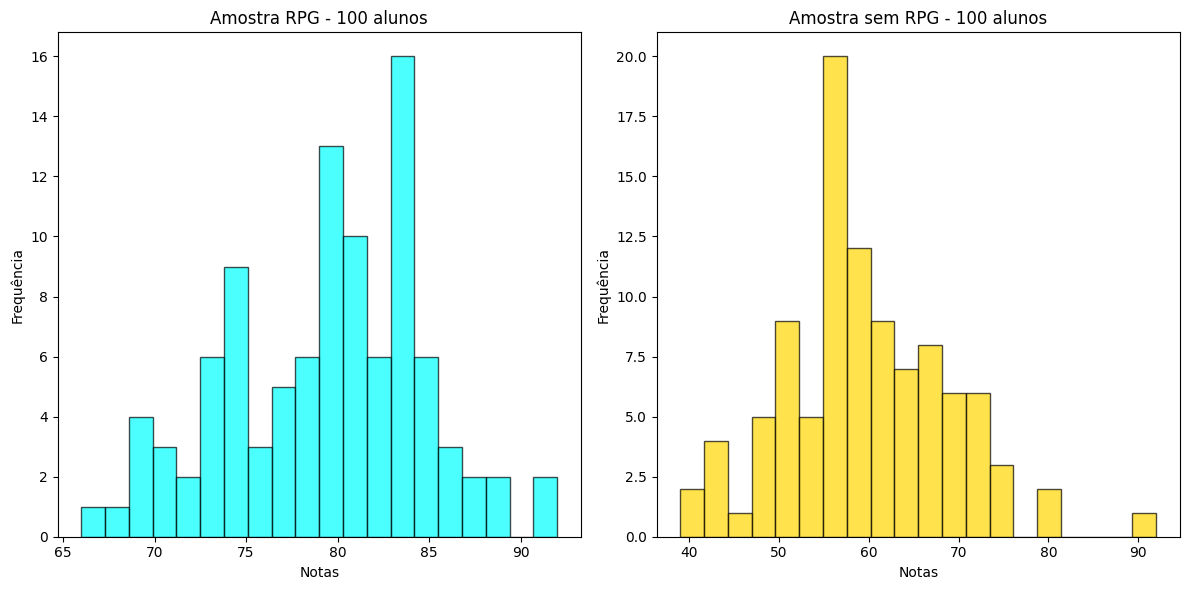

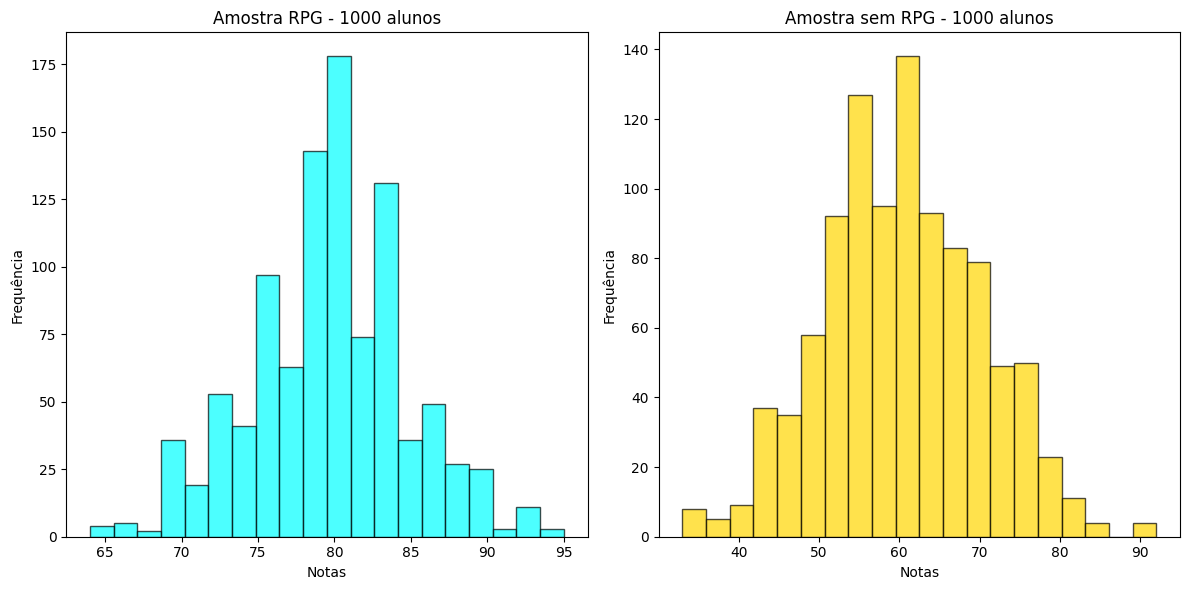

In [118]:
# Tamanhos de amostra pedidas por Dr. Betinho
tamanhos_amostra = [5, 50, 100, 1000]


def gera_amostra(n, notas):
    '''
    A função, a partir do módulo .choice, gera uma amostra de uma array (notas) sem reposição

    Args:
        n (int): O tamanho da amostra a ser gerada.
        notas (array): A lista de notas da qual a amostra será extraída.

    Returns:
        amostra (array): a amostra gerada
        
    '''
    amostra = np.random.choice(notas, size=n, replace=False)
    return amostra

for tamanho_amostra in tamanhos_amostra:
    amostra_RPG = gera_amostra(tamanho_amostra, notas_RPG)
    amostra_sem_RPG = gera_amostra(tamanho_amostra, notas_sem_RPG)
    
    # Plotando as amostras
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(amostra_RPG, bins=20, edgecolor='black', alpha=0.7, color='cyan')
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.title(f'Amostra RPG - {tamanho_amostra} alunos')

    plt.subplot(1, 2, 2)
    plt.hist(amostra_sem_RPG, bins=20, edgecolor='black', alpha=0.7, color='gold')
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.title(f'Amostra sem RPG - {tamanho_amostra} alunos')

    plt.tight_layout()
    plt.show()
    
    print()
    

## Comparando médias e desvio padrão

Nesta seção, calcularemos as médias e desvios padrão de cada uma das turmas e suas diferentes amostras, a fim de comparar tais diferenças.

In [80]:
import numpy as np


media_RPG = np.mean(notas_RPG)
media_sem_RPG = np.mean(notas_sem_RPG)


dp_RPG = np.std(notas_RPG)
dp_sem_RPG = np.std(notas_sem_RPG)


print(f"A turma que aprendeu com RPG tem a média da nota {media_RPG} com o desvio padrão {dp_RPG}")
print(f"Já a turma que não aprendeu com RPG tem a média da nota {media_sem_RPG} com o desvio padrão {dp_sem_RPG}")

A turma que aprendeu com RPG tem a média da nota 79.73833333333333 com o desvio padrão 5.178307048533226
Já a turma que não aprendeu com RPG tem a média da nota 60.475833333333334 com o desvio padrão 9.917379491187287


O resultado mostrado acima são resultado direto de como as notas de cada turma foram geradas, é claro. 

Agora, comparemos tais dados com o de cada amostra.

In [81]:
for tamanho_amostra in tamanhos_amostra:
    amostra_RPG = gera_amostra(tamanho_amostra, notas_RPG)
    amostra_sem_RPG = gera_amostra(tamanho_amostra, notas_sem_RPG)
    
    
    media_amostra_RPG = np.mean(amostra_RPG)
    media_amostra_sem_RPG = np.mean(amostra_sem_RPG)
    
    dp_amostra_RPG = np.std(amostra_RPG)
    dp_amostra_sem_RPG = np.std(amostra_sem_RPG)
    
    
    diferença_media_RPG = abs(media_amostra_RPG - media_RPG)
    diferenca_dp_RPG = abs(dp_amostra_RPG - dp_RPG)
    
    diferença_media_sem_RPG = abs(media_amostra_sem_RPG - media_sem_RPG)
    diferenca_dp_sem_RPG = abs(dp_amostra_sem_RPG - dp_sem_RPG)
    
    
    print(f"\nAmostra RPG com {tamanho_amostra} alunos:")
    print(f"Média da amostra: {media_amostra_RPG:.2f}, Desvio padrão da amostra: {dp_amostra_RPG:.2f}")
    print(f"Diferença entre a média da amostra e a média da população: {diferença_media_RPG:.2f}"), 
    print(f"Diferença entre o desvio padrão da amostra e da população: {diferenca_dp_RPG:.2f}\n")
    
    print(f"Amostra sem RPG com {tamanho_amostra} alunos:")
    print(f"Média da amostra: {media_amostra_sem_RPG:.2f}, Desvio padrão da amostra: {dp_amostra_sem_RPG:.2f}")
    print(f"Diferença entre a média da amostra e a média da população: {diferença_media_sem_RPG:.2f}"), 
    print(f"Diferença entre o desvio padrão da amostra e da população: {diferenca_dp_sem_RPG:.2f}\n")


Amostra RPG com 5 alunos:
Média da amostra: 73.80, Desvio padrão da amostra: 4.71
Diferença entre a média da amostra e a média da população: 5.94
Diferença entre o desvio padrão da amostra e da população: 0.47

Amostra sem RPG com 5 alunos:
Média da amostra: 63.80, Desvio padrão da amostra: 9.95
Diferença entre a média da amostra e a média da população: 3.32
Diferença entre o desvio padrão da amostra e da população: 0.03


Amostra RPG com 50 alunos:
Média da amostra: 80.14, Desvio padrão da amostra: 5.73
Diferença entre a média da amostra e a média da população: 0.40
Diferença entre o desvio padrão da amostra e da população: 0.55

Amostra sem RPG com 50 alunos:
Média da amostra: 61.20, Desvio padrão da amostra: 9.83
Diferença entre a média da amostra e a média da população: 0.72
Diferença entre o desvio padrão da amostra e da população: 0.08


Amostra RPG com 100 alunos:
Média da amostra: 79.65, Desvio padrão da amostra: 4.97
Diferença entre a média da amostra e a média da população: 

Assim, vemos que, quando se aumenta o tamanho da amostra, a média e o desvio padrão também se aproximam cada vez mais.

## Plotando um gráfico de médias

Dr. Beto e Anidel ficaram satisfeitos em perceber como o tamanho da amostra afetava a distribuição e, por consequência, como a turma era representada. Mas sortear 100, 1000 notas é extremamente trabalhoso, e eles querem saber como pode-se aproximar a média e o desvio padrão sem tanto trabalho de uma vez. Anidel, com seus conhecimentos de estatística, deu uma ideia: 
> *"Vamos sortear apenas 30 notas, com reposição. Depois, tiraremos a média dessa amostra. Repetiremos esse processo algumas vezes, até ter várias médias. Vamos plotar esse gráfico de médias e, por fim, tirar a média das médias. Testaremos diferentes números de média: 1, 100 e 1000 - acredito que, ao aumentar o número de médias, obteremos um resultado mais próximo da população."*

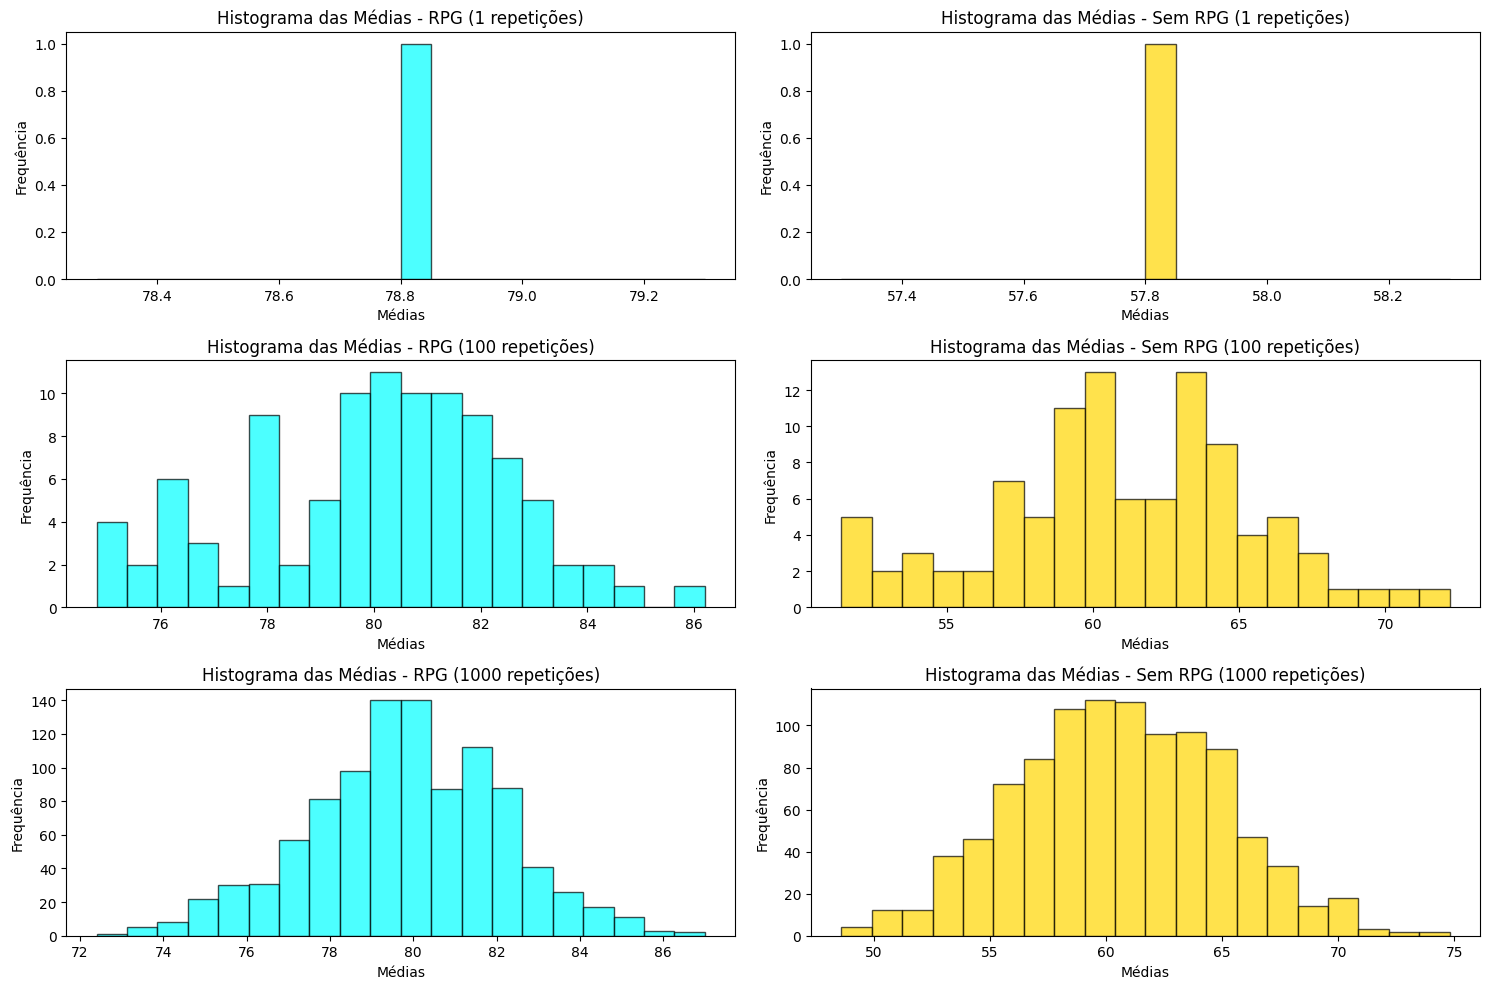

In [129]:
def gera_media_amostra(tamanho_amostra, notas):
    '''
        A função gera a média de uma amostra (notas) com reposição

    Args:
        tamanho_amostra (int): O tamanho da amostra a ser gerada.
        notas (array): A lista de notas da qual a amostra será extraída.

    Returns:
        media (float): A média da amostra
        
    '''
    amostra = np.random.choice(notas, size=tamanho_amostra, replace=True)
    amostra = np.round(amostra) 
    media = np.mean(amostra)
    return media


tamanho_amostra = 30

num_repeticoes_por_tamanho = [1, 100, 1000]

medias_RPG = []
medias_sem_RPG = []

for num_repeticoes in num_repeticoes_por_tamanho:
    medias_amostra_RPG = []
    medias_amostra_sem_RPG = []
    
    for _ in range(num_repeticoes):
        # Calcular a média para o tamanho de amostra especificado
        media_amostra_RPG = gera_media_amostra(tamanho_amostra, notas_RPG)
        media_amostra_sem_RPG = gera_media_amostra(tamanho_amostra, notas_sem_RPG)
        
        medias_amostra_RPG.append(media_amostra_RPG)
        medias_amostra_sem_RPG.append(media_amostra_sem_RPG)
    
    medias_RPG.append(medias_amostra_RPG)
    medias_sem_RPG.append(medias_amostra_sem_RPG)

# Plotar histogramas das médias
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, num_repeticoes in enumerate(num_repeticoes_por_tamanho):
    plt.subplot(len(num_repeticoes_por_tamanho), 2, i*2 + 1)
    plt.hist(medias_RPG[i], bins=20, edgecolor='black', alpha=0.7, color='cyan')
    plt.xlabel('Médias')
    plt.ylabel('Frequência')
    plt.title(f'Histograma das Médias - RPG ({num_repeticoes} repetições)')

    plt.subplot(len(num_repeticoes_por_tamanho), 2, i*2 + 2)
    plt.hist(medias_sem_RPG[i], bins=20, edgecolor='black', alpha=0.7, color='gold')
    plt.xlabel('Médias')
    plt.ylabel('Frequência')
    plt.title(f'Histograma das Médias - Sem RPG ({num_repeticoes} repetições)')

plt.tight_layout()
plt.show()


## Comparando a média das médias

In [130]:
print(f"A média de nota da turma que usa RPG é {media_RPG}")
print(f"A média de nota da turma que nã usa RPG é {media_sem_RPG}")
print("_______________________________________________________________________")

for num_repeticao in num_repeticoes_por_tamanho:
    media_amostra_RPG_list = []
    media_amostra_sem_RPG_list = []

    for _ in range(num_repeticao):
        media_amostra_RPG = gera_media_amostra(30, notas_RPG)
        media_amostra_sem_RPG = gera_media_amostra(30, notas_sem_RPG)

        media_amostra_RPG_list.append(media_amostra_RPG)
        media_amostra_sem_RPG_list.append(media_amostra_sem_RPG)

    media_amostra_RPG_mean = np.mean(media_amostra_RPG_list)
    media_amostra_sem_RPG_mean = np.mean(media_amostra_sem_RPG_list)

    diferenca_media_RPG = abs(media_amostra_RPG_mean - media_RPG)
    diferenca_media_sem_RPG = abs(media_amostra_sem_RPG_mean - media_sem_RPG)

    print(f"\nAmostra com RPG quando usamos {num_repeticao} médias")
    print(f"Média da amostra: {media_amostra_RPG_mean:.3f}")
    print(f"Diferença entre a média da amostra e a média da população: {diferenca_media_RPG:.3f}")

    print(f"\nAmostra sem RPG quando usamos {num_repeticao} médias")
    print(f"Média da amostra: {media_amostra_sem_RPG_mean:.3f}")
    print(f"Diferença entre a média da amostra e a média da população: {diferenca_media_sem_RPG:.3f}")
    print("__________________________________________________________________")

A média de nota da turma que usa RPG é 79.73833333333333
A média de nota da turma que nã usa RPG é 60.475833333333334
_______________________________________________________________________

Amostra com RPG quando usamos 1 médias
Média da amostra: 77.600
Diferença entre a média da amostra e a média da população: 2.138

Amostra sem RPG quando usamos 1 médias
Média da amostra: 61.400
Diferença entre a média da amostra e a média da população: 0.924
__________________________________________________________________

Amostra com RPG quando usamos 100 médias
Média da amostra: 80.220
Diferença entre a média da amostra e a média da população: 0.482

Amostra sem RPG quando usamos 100 médias
Média da amostra: 60.098
Diferença entre a média da amostra e a média da população: 0.378
__________________________________________________________________

Amostra com RPG quando usamos 1000 médias
Média da amostra: 79.598
Diferença entre a média da amostra e a média da população: 0.141

Amostra sem RPG qu

## Resultado e discussão



<p style='text-align:justify'>Ao variar o tamanho das amostras e repetições, pudemos observar que a distribuição das médias se aproxima cada vez mais de uma distribuição normal. Além disso, aumentando o número de médias, a média dessas médias se aproxima cada vez mais da média da população. O mesmo ocorre com o aumento do tamanho da tamanho da amostra. Esse comportamento é fundamental para a estatística, pois valida a aplicação do TLC em contextos reais: o fato de que conseguimos inferir características de uma população a partir de uma amostra.

Validamos também que, de fato, aula com RPG é muito mais efetiva :D

## Referências

$[1]$ https://www.scribbr.com/statistics/normal-distribution/

 

$[2]$ https://youtu.be/YAlJCEDH2uY?si=91KTHxi6v3rEIjiA

 

$[3]$ https://www.scribbr.com/statistics/t-test/

 

$[4]$ https://www.tibco.com/pt-br/reference-center/what-is-analysis-of-variance-anova

 

$[5]$ https://pt.wikipedia.org/wiki/Teorema_central_do_limite

Além disso, usamos como referência inicial os vídeos recomendados; O chatgpt também foi utilizado para plotar os gráficos e debugar o código.


## Playground



Use este espaço para fazer o que quiser. Não será considerado na correção.

